# Terningar og intro til simulering

Ein fin stad å starta med simulering er med terningar :game_die: Her er sannsynet *uniformt* (det er like sannsynleg å få 2 som 5), og dei ulike utfalla er heiltal. 

Det første som må gjerast er å gjera i stand "trekkaren" vår. Eg bruker her ein tilfeldighetsgenerator frå `NumPy` (dokumentasjon [her](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random)). 

In [2]:
import numpy as np
rng = np.random.default_rng()

Når me no har klargjort generatoren kan me bruka den innebygde `integers`-funksjonen for å trilla ein terning. 

:::{.callout-important}
## Merk

Dei to linjene med kode over **må** vera med i programmet for at det skal funka. I mange av døma i boka er ikkje desse to linjene med i alle kodesnuttane. 

:::

## Ein terning :game_die:

In [3]:
terning = rng.integers(1, 7)
print(terning)

6


::: {.callout-important}
## Merk

Her er verdien `terning` eit heiltal (*integer*) **større eller lik** 1 og **mindre enn** 7. <br>Sidan det er heiltal me trekk er dermed $$\text{terning} \in \{1, 2, 3, 4, 5, 6\}$$
:::

For å trilla fleire terningar kan me anten bruka løkker:

In [4]:
for i in range(10):
    print(rng.integers(1, 7))

3
4
1
6
5
2
1
5
1
5


eller så kan me legga inn eit argument `size` i `integers`. Då blir output ein array (ein form for liste) med `size` terningar:

In [5]:
terningar = rng.integers(1, 7, size=10)
print(terningar)

[2 3 4 6 1 1 1 1 6 6]


No har me det me treng for å kunna simulera eit stokastisk forsøk og estimera sannsyn ut frå simuleringa. Til dømes kan me prøva å finna ut av kor sannunleg det er å trilla 5 eller 6 på ein terning: 

In [7]:
N = 1000000 # tal simuleringar

terningar = rng.integers(1, 7, size=N)

gunstige = sum(terningar >= 5)

sannsyn = gunstige / N

print(f"Sannsynet for 5 eller 6 er {sannsyn:.4f}")

Sannsynet for 5 eller 6 er 0.3336


::: {.callout-tip collapse="true"}
## Forklaring: `gunstige = sum(terningar >= 5)`

For å forstå denne ser me på eit døme:

In [11]:
array = np.array([1, 2, 3, 4, 5, 6])

større_enn_3 = array > 3

print(array)
print(større_enn_3)
print(sum(større_enn_3))

[1 2 3 4 5 6]
[False False False  True  True  True]
3


Altså gjer me om verdiar til `True` eller `False`. Python reknar `True` som 1 og `False` som 0. Når me då summerer alle elementa i `array` får me antall `True` i arrayen. 
:::

## Fleire terningar :game_die: :game_die:

Spørsmål som “Kva er sannsynet for at produktet av to terningar er 8 eller mindre” er fint å finna svar på ved hjelp av simulering:

In [12]:
N = 1000000

terning1 = rng.integers(1, 7, size=N)
terning2 = rng.integers(1, 7, size=N)

produkt = terning1 * terning2
gunstige = sum(produkt <= 8)
sannsyn = gunstige / N

print(f"Sannsynet er {sannsyn:.4f}")

Sannsynet er 0.4452


::: {.callout-tip collapse="true"}
## Forklaring: `produkt = terning1 * terning2`

Kodelinja finn produktet av element på samme plass i dei to arrayane. Sjekk dømet: 

In [13]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])

c = a * b

print(c)

[ 6 14 24 36 50]


$1\cdot 6 = 6$ og $2\cdot 7 = 14$...
:::

## Nøyaktighet :dart:

Sjekkar kva som skjer når me triller fleire og fleire terningar (eller ein terning fleire gongar). For å visa samanhengen plottar me resultatet. I dømet ser me på sannsynet for å trilla 4 på ein terning.

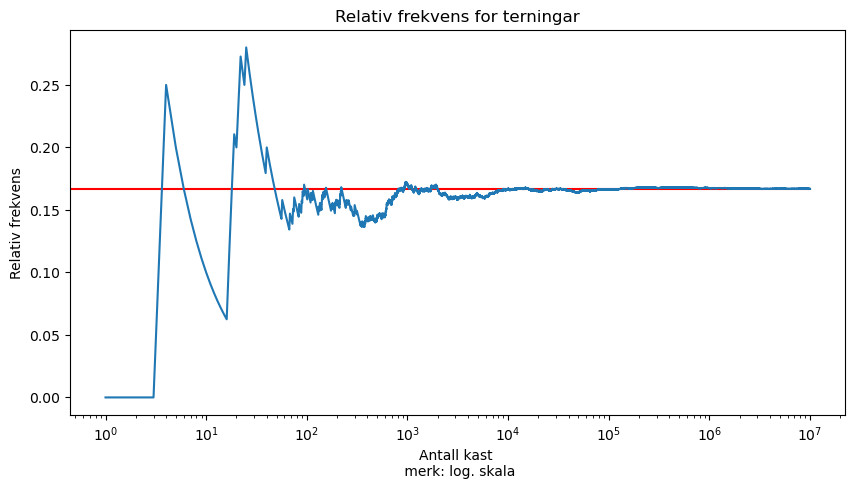

In [14]:
#| code-line-numbers: true
import matplotlib.pyplot as plt

# antall kast
N = 10000000

# triller terningar
terningar = rng.integers(1, 7, size=N)

# finn den kumulative summen av terningar som er lik 4
kumulativ_sum = np.cumsum(terningar == 4)

# lager "x-akse" frå 1 til N
x = np.arange(1, N + 1)

# finn relativ frekvens
rel_frekvens = kumulativ_sum / x

plt.figure(figsize=(10, 5))                      # lagar ein figur med 10x5 mål
plt.hlines(1/6, 0, N, color="red")               # teiknar ein linje med farge "red" for den teoretiske verdien
plt.plot(x, rel_frekvens)                        # plottar x-akse og y-akse    
plt.xscale("log")                                # logaritmisk x-akse
plt.xlabel("Antall kast \n merk: log. skala")    # namn på x-aksen
plt.ylabel("Relativ frekvens")                   # namn på y-aksen
plt.title("Relativ frekvens for terningar")      # tittel på figur
plt.show()

Her ser me at di fleire kast me gjennomfører, di nærare kjem den relative frekvensen den teoretiske verdien for å trilla ein firar på vanleg terning.

 
$$ P(\text{firar}) = \frac{1}{6} \approx 0.167 $$